# $Problema 1$

1. Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecua-
ciones diferenciales:

(a) Integración con método de Euler

(b) Integración sobre serie de Taylor a 2° orden

(c) Integración con método de Runge-Kutta de 2° orden

(d) Integración con método de Runge-Kutta de 4° orden


Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$ẍ + 0.5 ẋ + sin x = e −t sin(3t)\hspace{50mm}(1)$$
Con condiciones iniciales      $ẋ(0) = 1 \hspace{1mm}y\hspace{1mm }x(0) = 0$

Primeramente mandamos a llamar los notebooks $Calculator\hspace{1mm} y\hspace{1mm} Metodos\hspace{1mm}para\hspace{1mm}obtener\hspace{1mm}raices$ en los cuales se encuentran los codigos de los integradores númerica de Runge Kutta a 2 y 4 orde, Euler y Taylor a segundo orden, así como los metodos para obtener raices( Newton y bisección).

In [51]:
%run calculator.ipynb   # contienen los metodos de integración numerica 
%run Metodos_para_obtener_raices.ipynb # contine los metodos para encontrar raices



Para resolver la ecuación del oscilador armonico sobreamortiguado podemos hacer un camio de variable de tal manera que definimos nuestro sistema de ecuaciones como f1 y a su jacobiano junto con su derivada resppecto al tiempo como Jac_f1, esta ultima funcion nos servira pra usar el metro de integracion de Taylor a segundo orden.



In [3]:
def f1(x,t):
    return array([ x[1] , exp(-t)*sin(3*t) -(0.5*x[1]) - (sin(x[0]))])


In [4]:
def Jac_f1(x,t):
    d_ec=array([0,-3*exp(-t)*cos(3*t)])
    du1dx=-cos(x[0])
    du2dt=-0.5
    j_ve=array([[0,1],[du1dx,du2dt]])
    return d_ec,j_ve


### Graficas comparando los 4 metodos de integracción.

En el siguiente cuadro de programa obtengo la solución nuemrica de la funcion anteriormente definida con condiciones iniciales    $ẋ(0) = 1 \hspace{1mm}y\hspace{1mm }x(0) = 0$ y en un intervalo de $t:{0,10}$, posteriormente escribo codigo para poder graficar los resultados obtenidos con cada metodo.


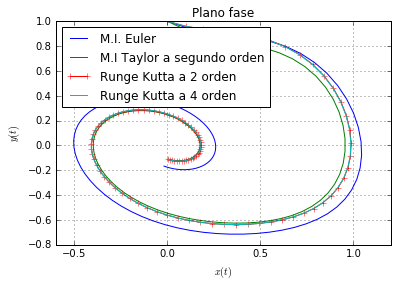

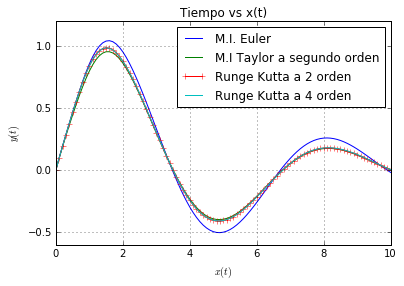

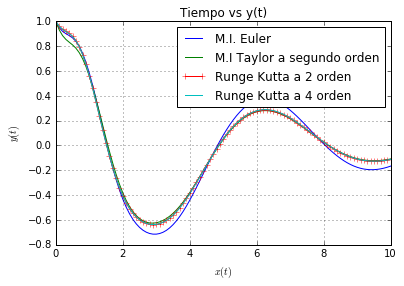

In [21]:
t,x= euler_var(f1,[0,1],[0,10],0.1)
t2,x2 = integra2(f1,Jac_f1,[0,1],[0,10],0.1)
t3,x3 = R_Kutta(f1,[0,1],[0,10],0.1)
t4,x4 = R_Kutta_4(f1,[0,1],[0,10],0.1)

figure(1)
plot(x[:,0],x[:,1], label="M.I. Euler")
plot(x2[:,0],x2[:,1], label="M.I Taylor a segundo orden")
plot(x3[:,0],x3[:,1],"+-", label= "Runge Kutta a 2 orden")
plot(x4[:,0],x4[:,1], label= "Runge Kutta a 4 orden")
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("Plano fase")

figure(2)
plot(t,x[:,0],label="M.I. Euler")
plot(t2,x2[:,0], label="M.I Taylor a segundo orden")
plot(t3,x3[:,0],"+-", label= "Runge Kutta a 2 orden")
plot(t4,x4[:,0], label= "Runge Kutta a 4 orden")
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("Tiempo vs x(t)")

figure(3)
plot(t,x[:,1], label="M.I. Euler")
plot(t2,x2[:,1], label="M.I Taylor a segundo orden")
plot(t3,x3[:,1],"+-", label= "Runge Kutta a 2 orden")
plot(t4,x4[:,1], label= "Runge Kutta a 4 orden")
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("Tiempo vs y(t)")
show()

Como se puede apreciar en las graficas, dandole un paso a  los integradores de 0.1 encontraremos direncia entre los valores, teniendo que el metodo de Euler es el que converge de marea mas lenta a comparación del resto, mientras que una aproximación numerica mas eficiente y con mayor convergencia a la solucion de la ecuacion dada resultan ser los integradores de Runge Kutta y en especial el de cuarto orden.

# $ Problema 2$


Primeramente definire a f2 como la función que contenga al sistema de ecuciones direfenciales el cual se pide encontrar un mejor paso de integración tal que queda mostrar un mejor comportamiento del movimiento regido por la expreción:

$$\begin{equation}\dddot{y} + ÿ 2 − 3 ẏ 3 + cos 2 y = e −t sin(3t)
\end{equation}$$

Con condiciones iniciales$ ÿ(1) = 1, ẏ(1) = 2, y(1) = 1. $En particular que sucede en el intervalo  $ t ∈ [1, 2]$
y $t ∈ [1, 2.1]$.

In [23]:
def f2(y,t):
    return array([y[1],y[2],(-(y[2]**2) + 3*(y[1]**3 ) - (cos(y[0]))**2 + ((e**-t) *sin(3*t)))])

## Metodo de Euler

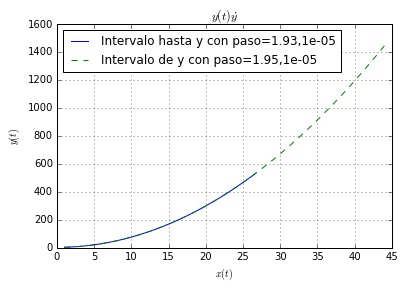

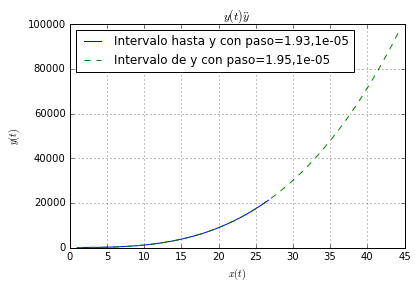

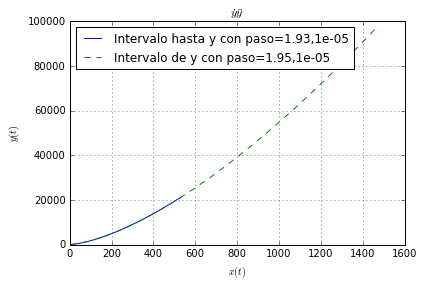

In [33]:
t,x= euler_var(f2,[1,2,1],[1,1.93],0.00001)
t3,x3 = euler_var(f2,[1,2,1],[1,1.95],0.00001)
figure(1)
plot(x[:,0],x[:,1], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,1],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))

grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$y(t)\dot{y}$")

figure(2)
plot(x[:,0],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$y(t)\ddot{y}$")

figure(3)
plot(x[:,1],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,1],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$\dot{y}\ddot{y}$")

## Metodo de Runge Kutta 2° orden

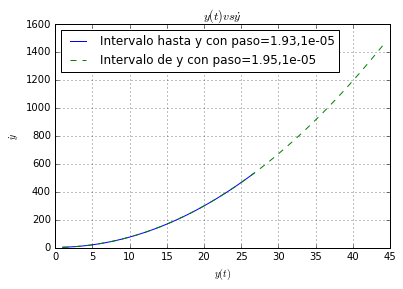

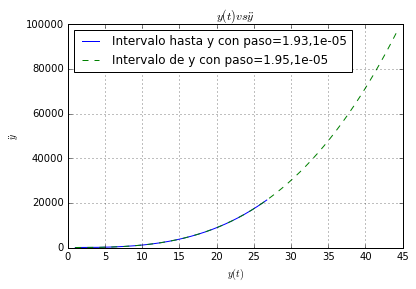

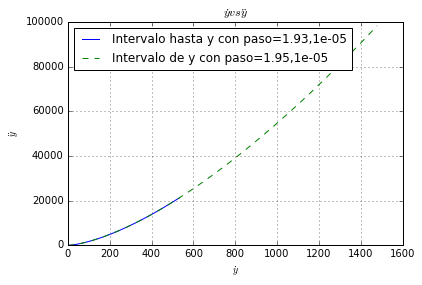

In [34]:
t,x= R_Kutta(f2,[1,2,1],[1,1.93],0.00001)
t3,x3 = R_Kutta(f2,[1,2,1],[1,1.95],0.00001)
figure(1)
plot(x[:,0],x[:,1], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,1],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))

grid(True)
legend(loc=0)
xlabel("$y(t)$"), ylabel("$\dot{y}$")
title("$y(t)vs\dot{y}$")

figure(2)
plot(x[:,0],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$y(t)$"), ylabel("$\ddot{y}$")
title("$y(t)vs\ddot{y}$")

figure(3)
plot(x[:,1],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,1],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$\dot{y}$"), ylabel("$\ddot{y}$")
title("$\dot{y}vs\ddot{y}$")

## Metodo de Runge Kutta 4° orden

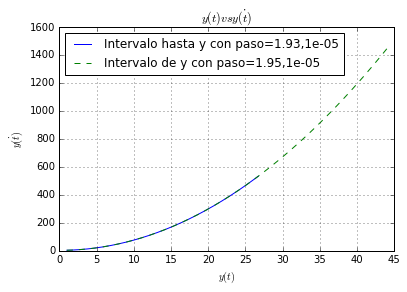

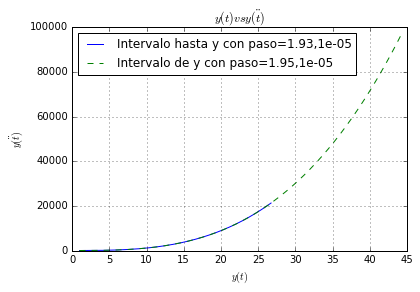

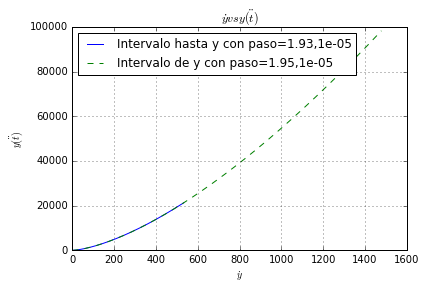

In [37]:
t,x= R_Kutta_4(f2,[1,2,1],[1,1.93],0.00001)
t3,x3 = R_Kutta_4(f2,[1,2,1],[1,1.95],0.00001)
figure(1)
plot(x[:,0],x[:,1], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,1],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))

grid(True)
legend(loc=0)
xlabel("$y(t)$"), ylabel("$\dot{y(t)}$")
title("$y(t)vs\dot{y(t)}$")

figure(2)
plot(x[:,0],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$y(t)$"), ylabel("$\ddot{y(t)}$")
title("$y(t)vs\ddot{y(t)}$")

figure(3)
plot(x[:,1],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,1],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$\dot{y}$"), ylabel("$\ddot{y(t)}$")
title("$\dot{y}vs\ddot{y(t)}$")

## Taylor a 2° orden

In [ ]:
t,x= integra2(f2,jac_f2,[1,2,1],[1,1.93],0.00001)
t3,x3 = integra2(f2,jac_f2,[1,2,1],[1,1.95],0.00001)
figure(1)
plot(x[:,0],x[:,1], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,1],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$y(t)\dot{y(t)}$")

figure(2)
plot(x[:,0],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,0],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$y(t)\ddot{y(t)}$")

figure(3)
plot(x[:,1],x[:,2], label="Intervalo hasta y con paso="+str(1.93)+","+str(0.00001))
plot(x3[:,1],x3[:,2],"--", label= "Intervalo de y con paso="+str(1.95)+","+str(0.00001))
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("$\dot{y(t)}\ddot{y(t)}$")

## Comparacion de la convergencia de los metodos de integración

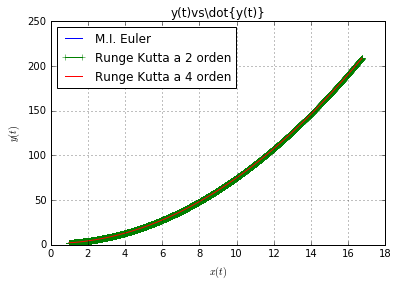

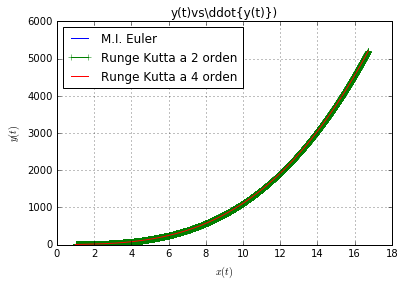

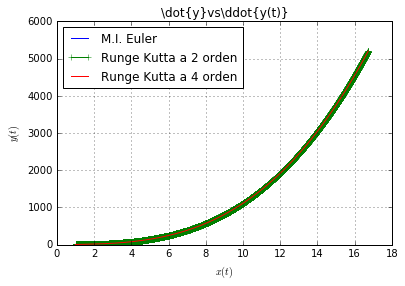

In [25]:
t,x= euler_var(f2,[1,2,1],[1,1.9],0.00001)
#t2,x2 = integra2(f2,Jac_f2,[0,1],[0,10],0.1)
t3,x3 = R_Kutta(f2,[1,2,1],[1,1.9],0.00001)
t4,x4 = R_Kutta_4(f2,[1,2,1],[1,1.9],0.00001)

figure(1)
plot(x[:,0],x[:,1], label="M.I. Euler")
#plot(x2[:,0],x2[:,1], label="M.I Taylor a segundo orden")
plot(x3[:,0],x3[:,1],"--", label= "Runge Kutta a 2 orden")
plot(x4[:,0],x4[:,1], label= "Runge Kutta a 4 orden")
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("y(t)vs\dot{y(t)}")

figure(2)
plot(x[:,0],x[:,2], label="M.I. Euler")
#plot(x2[:,0],x2[:,2], label="M.I Taylor a segundo orden")
plot(x3[:,0],x3[:,2],"--", label= "Runge Kutta a 2 orden")
plot(x4[:,0],x4[:,2], label= "Runge Kutta a 4 orden")
grid(True)
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("y(t)vs\ddot{y(t)})")

figure(3)
plot(x[:,0],x[:,2], label="M.I. Euler")
#plot(x2[:,0],x2[:,2], label="M.I Taylor a segundo orden")
plot(x3[:,0],x3[:,2],"--", label= "Runge Kutta a 2 orden")
plot(x4[:,0],x4[:,2], label= "Runge Kutta a 4 orden")
grid(True)
grid(True)
legend(loc=0)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("\dot{y}vs\ddot{y(t)}")
show()

# $Problema 3$

Retomando el como ejemplo el problema 1 escribimos la funcion f1_mod  como la ecuación indicada, en la cual modificaremos desde la funcion la variable $w$ 
$$ẍ + 10
ẋ + 4 sin x = 12 sin(ωt)
$$
Con condiciones iniciales ẋ(0) = 1 y x(0) = 0 y para ω = {1, 1.1, 1.2, 1.3, ..., 2.9, 3}. posteriosmente obtengo la gráfica de algunas soluciones que representen el comportamiento de la solución en función de ω.



In [38]:
def f1_mod(x,t,w):
    return array([x[1],-(0.1)*x[1] -4*sin(x[0]) + (0.5)*sin(w*t)])


## Metodo de Runge Kutta 2° orden

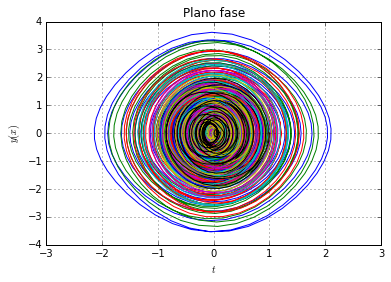

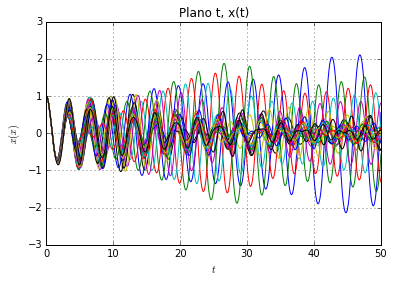

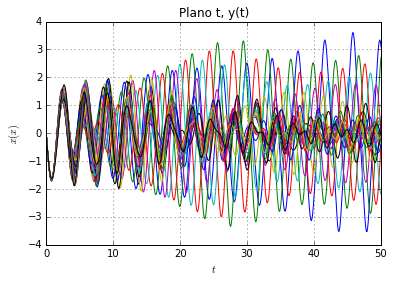

In [44]:
w=arange(1,3.1,0.1)
figure(1)
for i in w:
    
    t,x= R_Kutta_m(f1_mod,[1,0],[0,50],0.1,i)
    plot(x[:,0],x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$y(x)$")
title("Plano fase")

figure(2)
for i in w:
    
    t,x= R_Kutta_m(f1_mod,[1,0],[0,50],0.1,i)
    plot(t,x[:,0], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, x(t)")
#egend(loc=0)

figure(3)
for i in w:
    
    t,x= R_Kutta_m(f1_mod,[1,0],[0,50],0.1,i)
    plot(t,x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, y(t)")
#egend(loc=0)
show()

## Método Runge Kutta 4° oden

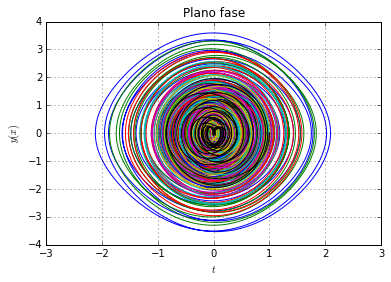

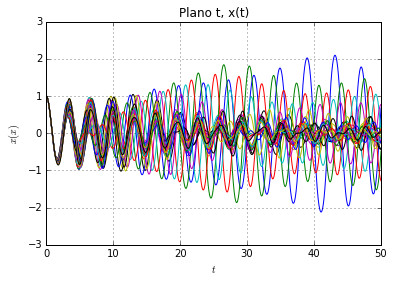

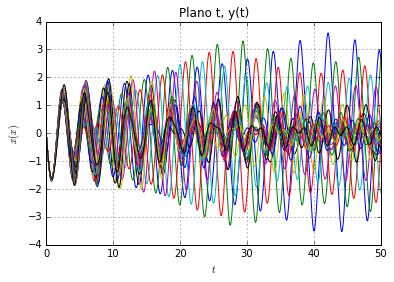

In [52]:
w=arange(1,3.1,0.1)
figure(1)
for i in w:
    
    t,x= RK4(f1_mod,[1,0],[0,50],0.01,i)
    plot(x[:,0],x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$y(x)$")
title("Plano fase")

figure(2)
for i in w:
    
    t,x= RK4(f1_mod,[1,0],[0,50],0.01,i)
    plot(t,x[:,0], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, x(t)")
#egend(loc=0)

figure(3)
for i in w:
    
    t,x= RK4(f1_mod,[1,0],[0,50],0.01,i)
    plot(t,x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, y(t)")
#egend(loc=0)
show()

## Método Euler

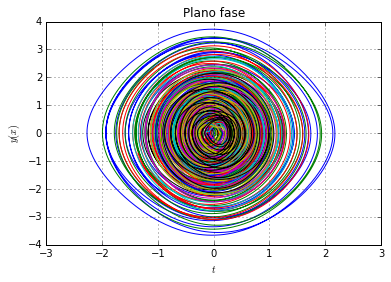

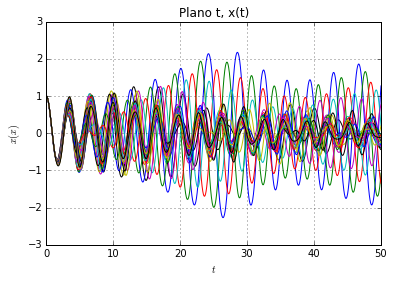

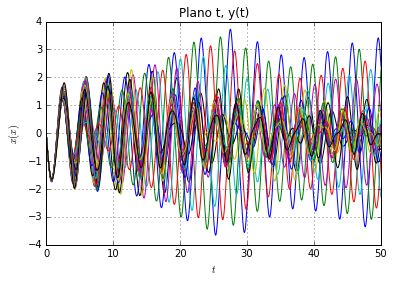

In [53]:
w=arange(1,3.1,0.1)
figure(1)
for i in w:
    
    t,x= euler_var_m(f1_mod,[1,0],[0,50],0.01,i)
    plot(x[:,0],x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$y(x)$")
title("Plano fase")

figure(2)
for i in w:
    
    t,x= euler_var_m(f1_mod,[1,0],[0,50],0.01,i)
    plot(t,x[:,0], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, x(t)")
#egend(loc=0)

figure(3)
for i in w:
    
    t,x= euler_var_m(f1_mod,[1,0],[0,50],0.01,i)
    plot(t,x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, y(t)")
#egend(loc=0)
show()

## Método Taylor 2° orden

In [ ]:
w=arange(1,3.1,0.1)
figure(1)
for i in w:
    
    t,x= integra2_m(f1_mod,jac_fim,[1,0],[0,50],0.1,i)
    plot(x[:,0],x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$y(x)$")
title("Plano fase")

figure(2)
for i in w:
    
    t,x=integra2_m(f1_mod,jac_fim,[1,0],[0,50],0.1,i)
    plot(t,x[:,0], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, x(t)")
#egend(loc=0)

figure(3)
for i in w:
    
    t,x= integra2_m(f1_mod,jac_fim,[1,0],[0,50],0.1,i)
    plot(t,x[:,1], label="w="+str(i))
grid(True)
xlabel("$t$"), ylabel("$x(x)$")
title("Plano t, y(t)")
#egend(loc=0)
show()

Conforme aumenta el valor de w el las orbitas descritas por la función se puede apreciar como aumentan y decrementan periodicamente, esto es debido a que wt es el argumento del seno lo cual hace que oscile la amplitud de las orbitas.


# $Problema 4$

Primeramente defino la función f3 con el sistema de ecuaciones  diferenciales que determinaran a el Atractor de Lorentz

In [113]:
def f3(x,t):
    dx_dt= 10*(x[1] - x[0])
    dy_dt= x[0]*(28 -x[2])
    dz_dt=( x[0] * x[1]) - (8/3)*x[2]
    f3=array([dx_dt,dy_dt,dz_dt])
    return f3

Ahora con la función random.randint() indico que valorea aleatorios pueden tomar mis condiciones iniciales.
despues la valuo y con el método de Runge Kutta 4° grado obtengo las soluciones para las distintas condiciones iniciales

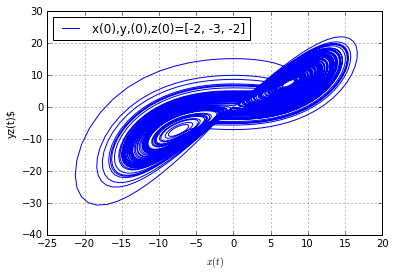

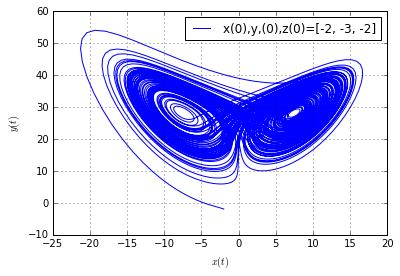

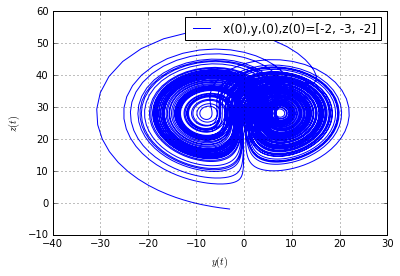

In [114]:
x=(random.randint(-5,5))
y=(random.randint(-5,5))
z=(random.randint(-5,5))
u=[x,y,z]
t,x= R_Kutta_4(f3,u,[0,100],0.01)

figure(1)
plot(x[:,0],x[:,1],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$x(t)$"), ylabel("yz(t)$")
legend(loc=0)


figure(2)
plot(x[:,0],x[:,2],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$x(t)$"), ylabel("$y(t)$")
legend(loc=0)


figure(3)
plot(x[:,1],x[:,2],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$y(t)$"), ylabel("$z(t)$")
legend(loc=0)
#axes().set_aspect('equal')

show()

La función dada se trata del atractor de Lorentz,el cual con los valores constantes dados se describe un comportamiento caotico, al variar las condiciones iniciales se obtienen trayectorias que divergen, aunque sea poca la diferncia de las condiciones iniciales no se asemejará el comportamiento de la trayectoria anterio, por ello se le considera un atractor extraño.

b)

Tomando 3 trayectorias somilares en las que solo la condición inicial en y para cada trayectoria varien 10^-2 


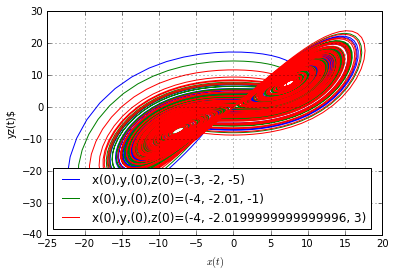

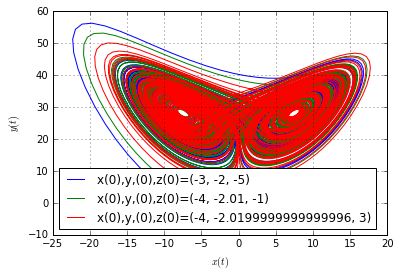

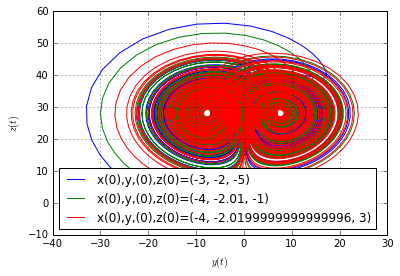

In [122]:

y1=(random.randint(-5,5))
y2=-(10**-2)+y1
y3=-(10**-2)+y2
Y=[y1,y2,y3]
for i in Y:
    
    x=(random.randint(-5,5))
    z=(random.randint(-5,5))
    u=(x,i,z)
    t,x= R_Kutta_4(f3,u,[0,100],0.01)
    figure()
    figure(1)
    plot(x[:,0],x[:,1],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$x(t)$"), ylabel("yz(t)$")
    legend(loc=0)


    figure(2)
    plot(x[:,0],x[:,2],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$x(t)$"), ylabel("$y(t)$")
    legend(loc=0)


    figure(3)
    plot(x[:,1],x[:,2],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$y(t)$"), ylabel("$z(t)$")
    legend(loc=0)
show()

Como anteriormente mencione el sistema es un atractor extraño en el cual apesar de que la diferencia de las condiciones iniciales sean minimas, como fue el caso que grafique con y1>y2>y3
 por una diferencia de $10^{-2}$ las trayectorias divergen considerablemente.